In [1]:
from statistics import mean
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.svm import SVC
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold

In [2]:
training_data = pd.read_csv('../archive/fashion-mnist_train.csv')

train_y = training_data['label']

train_X = training_data.drop('label',axis=1)

test_data = pd.read_csv('../archive/fashion-mnist_test.csv')

test_y = test_data['label']

test_X = test_data.drop('label',axis=1)

#label
# 0 T-shirt/top
# 1 Trouser
# 2 Pullover
# 3 Dress
# 4 Coat
# 5 Sandal
# 6 Shirt
# 7 Sneaker
# 8 Bag
# 9 Ankle boot

In [3]:
## normalization
train_X = train_X / 255.0
test_X = test_X /255.0


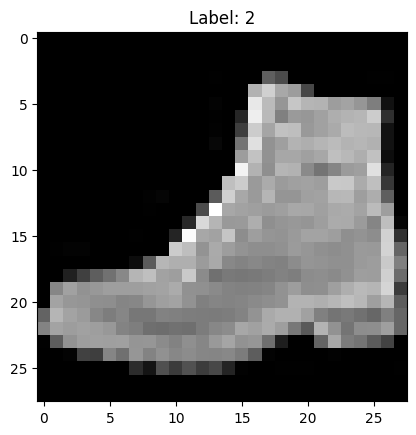

In [6]:
sample_image = train_X.iloc[12151].values.reshape(28, 28)  

plt.imshow(sample_image, cmap='gray')
plt.title(f'Label: {train_y.iloc[0]}') 
plt.show()

각 모델별로 파라미터 바꿔보면서 앙상블도 해보고 score 가장 높은거 기록해두기! !


In [7]:
svc = SVC(gamma='scale', kernel='rbf', C=8)
svc.fit(train_X, train_y)

accuracy = svc.score(test_X, test_y)
print(f"Test accuracy: {accuracy}")

Test accuracy: 0.9089


SVM(C=8) : 0.9089~


In [4]:
svc = SVC(gamma='scale', kernel='rbf', C=20)
svc.fit(train_X, train_y)

accuracy = svc.score(test_X, test_y)
print(f"Test accuracy: {accuracy}")

Test accuracy: 0.909


svc(C=20) : 0.909

In [5]:
from sklearn.ensemble import RandomForestClassifier

# 랜덤 포레스트 모델 생성 및 훈련
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(train_X, train_y)

rf_model.score(test_X,test_y)

0.8832

랜덤포레스트 정확도( 트리 개수 100)  : 0.8866

In [12]:
from sklearn.ensemble import VotingClassifier


In [11]:

models = [('svm', svc), ('random_forest', rf_model)]

ensemble_model = VotingClassifier(models, voting='hard')

# 앙상블 모델 훈련
ensemble_model.fit(train_X, train_y)

# 앙상블 모델 평가
ensemble_accuracy = ensemble_model.score(test_X, test_y)
print(f'앙상블 모델의 정확도: {ensemble_accuracy}')

앙상블 모델의 정확도: 0.8954


앙상블 ( 랜덤포레스트 + svm ) (hard voting) : 0.8968

In [9]:
models = [('svm', svc), ('random_forest', rf_model)]

ensemble_model = VotingClassifier(models, voting='soft')

# 앙상블 모델 훈련
ensemble_model.fit(train_X, train_y)

# 앙상블 모델 평가
ensemble_accuracy = ensemble_model.score(test_X, test_y)
print(f'앙상블 모델의 정확도: {ensemble_accuracy}')

AttributeError: predict_proba is not available when  probability=False

앙상블 ( 랜덤포레스트 + svm ) (soft voting) : 

In [6]:
from sklearn.linear_model import LogisticRegression

logistic_regression_model = LogisticRegression(max_iter=100)

# 모델 훈련
logistic_regression_model.fit(train_X, train_y)

# 테스트 데이터에 대한 예측
predictions = logistic_regression_model.predict(test_X)

# 정확도 계산
accuracy = (predictions == test_y).mean()
print(f'로지스틱 회귀 모델의 정확도: {accuracy}')

로지스틱 회귀 모델의 정확도: 0.8565


C:\Users\82102\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


로지스틱 회귀 정확도 
##### epoch 20 : 0.81,
##### epoch 100 : 0.8544,
##### epoch 150 : 0.8541
##### epoch 250 : 0.8492,
##### epoch 500 : 0.8467,


In [13]:

models = [('svm', svc), ('random_forest', rf_model), ('logistic_regression', logistic_regression_model)]

ensemble_model = VotingClassifier(models, voting='hard')

# 앙상블 모델 훈련
ensemble_model.fit(train_X, train_y)

# 앙상블 모델 평가
ensemble_accuracy = ensemble_model.score(test_X, test_y)
print(f'3개 모델 앙상블 모델의 정확도: {ensemble_accuracy}')

C:\Users\82102\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


3개 모델 앙상블 모델의 정확도: 0.898


In [7]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score


In [31]:
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# 모델 학습
gb_model.fit(train_X, train_y)

# 테스트 데이터로 예측
y_pred_gb = gb_model.predict(test_X)

# 정확도 평가
accuracy_gb = accuracy_score(test_y, y_pred_gb)
print(f'그라디언트 부스팅 모델의 정확도: {accuracy_gb * 100:.2f}%')

KeyboardInterrupt: 

In [8]:
from xgboost import XGBClassifier

In [9]:
xgb = XGBClassifier(use_label_encoder=False,objective="multi:softmax",eval_metric="merror")
xgb.fit(train_X,train_y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='merror',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softmax', ...)

In [10]:
# 테스트 데이터로 예측
y_pred_xgb = xgb.predict(test_X)

# 정확도 평가
accuracy_xgb = accuracy_score(test_y, y_pred_xgb)
print(f'xgboost  모델의 정확도: {accuracy_xgb}  ')

xgboost  모델의 정확도: 0.9063  


In [13]:

models = [('svm', svc), ('xgb', xgb)]

ensemble_model = VotingClassifier(models, voting='hard')

# 앙상블 모델 훈련
ensemble_model.fit(train_X, train_y)

# 앙상블 모델 평가
ensemble_accuracy = ensemble_model.score(test_X, test_y)
print(f'앙상블 모델의 정확도: {ensemble_accuracy}')

앙상블 모델의 정확도: 0.9098


In [14]:

models = [('svm', svc),('randomforest', rf_model), ('xgb', xgb)]

ensemble_model = VotingClassifier(models, voting='hard')

# 앙상블 모델 훈련
ensemble_model.fit(train_X, train_y)

# 앙상블 모델 평가
ensemble_accuracy = ensemble_model.score(test_X, test_y)
print(f'앙상블 모델의 정확도: {ensemble_accuracy}')

앙상블 모델의 정확도: 0.9103


In [15]:

models = [('svm', svc),('randomforest', rf_model), ('xgb', xgb),('lr',logistic_regression_model)]

ensemble_model = VotingClassifier(models, voting='hard')

# 앙상블 모델 훈련
ensemble_model.fit(train_X, train_y)

# 앙상블 모델 평가
ensemble_accuracy = ensemble_model.score(test_X, test_y)
print(f'앙상블 모델의 정확도: {ensemble_accuracy}')

C:\Users\82102\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


앙상블 모델의 정확도: 0.9045


In [ ]:
svc = SVC(gamma='scale',kernel='rbf',C=8)

cv_results = cross_validate(svc, train_X, train_y, cv=3)

print(f"Validation acc for each fold: {cv_results['test_score']}")
print(f"Mean acc:  {mean(cv_results['test_score'])}")